In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau
import process_utility as prsu

# SiPM2 30 V - ABALONE at 0 V - threshold 30

In [2]:
folder = '/home/abalone-data/background-lyso/30Vthr30'
file1 = f'{folder}/2022_04_27_T1456_ABALONE_0kV_SiPM2_30V_thr30.dat'
file2 = f'{folder}/2022_04_28_T0818_ABALONE_0kV_SiPM2_30V_thr30.dat'
file3 = f'{folder}/2022_04_28_T1143_ABALONE_0kV_SiPM2_30V_thr30.dat'
file4 = f'{folder}/2022_05_02_T1553_ABALONE_0kV_SiPM2_30V_thr30.dat'

/home/abalone-data/background-lyso/30Vthr30/2022_04_27_T1456_ABALONE_0kV_SiPM2_30V_thr30.dat Number of events 433625.0
Total events number: 433625
event n. 0 time to process: 0.01
event n. 100000 time to process: 25.78
event n. 200000 time to process: 51.80
event n. 300000 time to process: 78.07
event n. 400000 time to process: 103.92


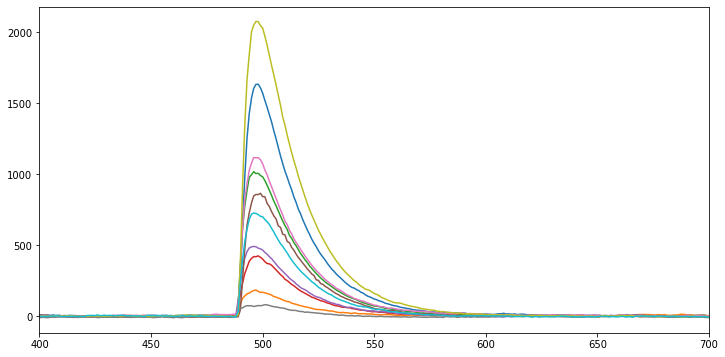

In [3]:
data1 = pau.process_abalone_data(filename=file1,nn=0,nplot=10,volts=0,sipmv=30)

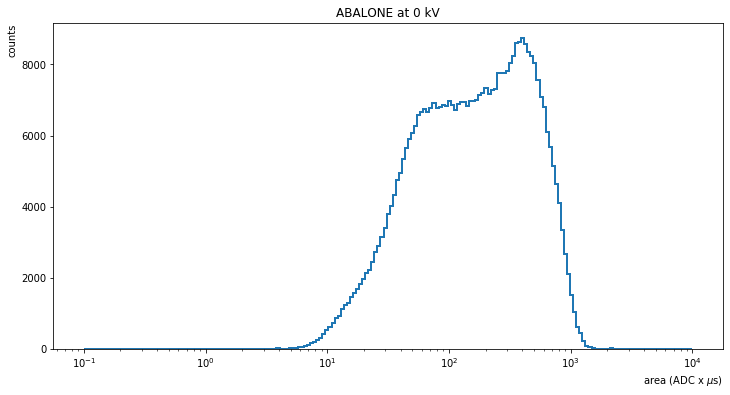

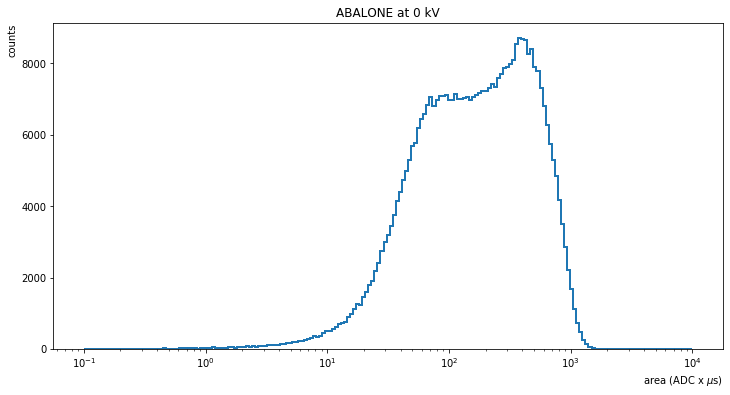

<Figure size 864x432 with 0 Axes>

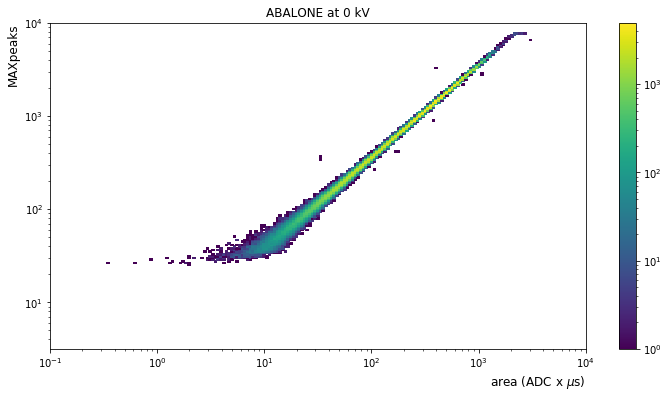

<Figure size 864x432 with 0 Axes>

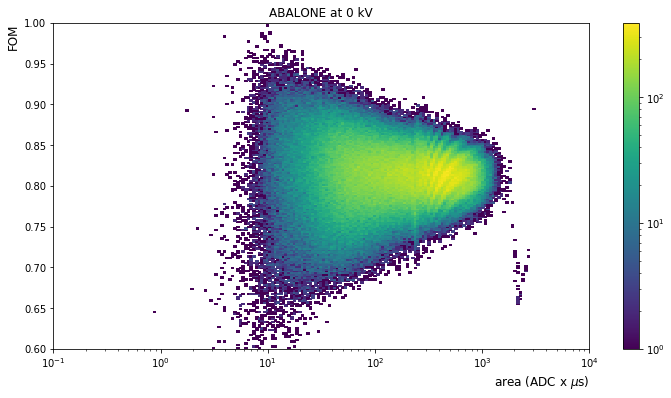

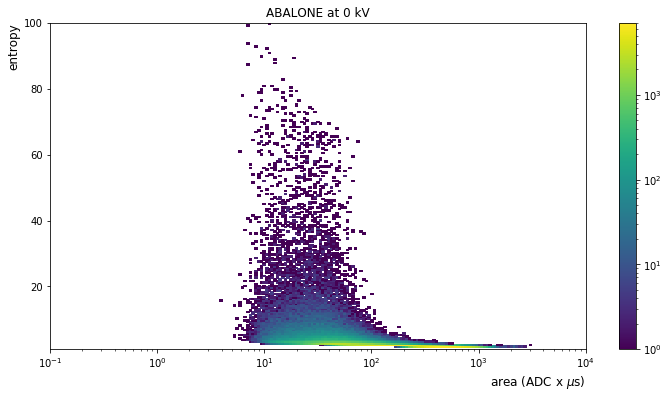

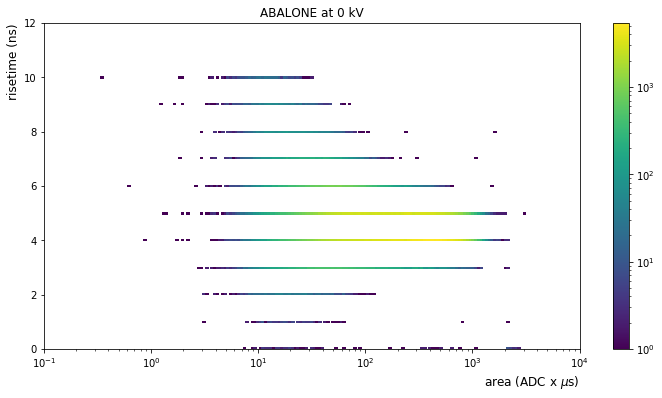

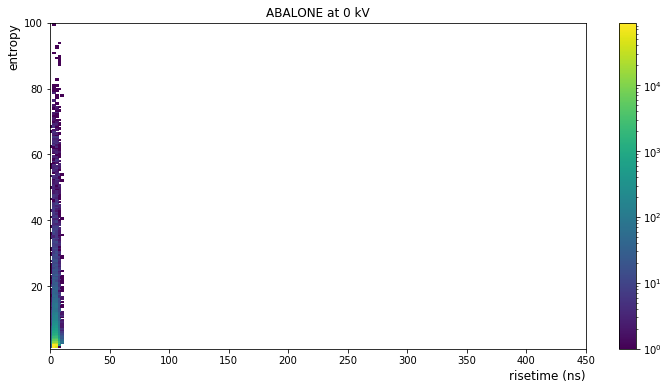

<Figure size 864x432 with 0 Axes>

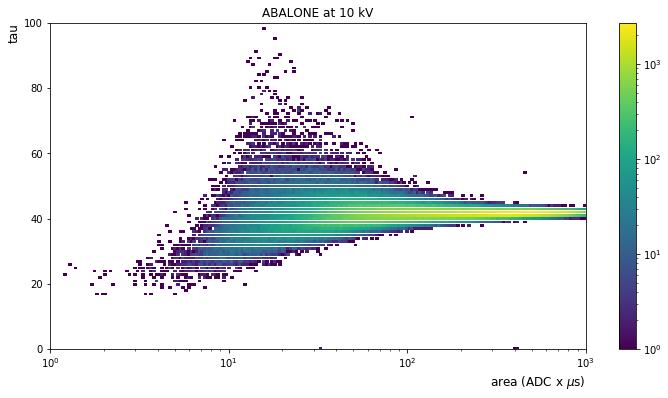

In [4]:
pau.plot_data(data=data1,fvolt=0,low=-1, high=4,low_max=0.5,high_max=4,
              low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=12)

/home/abalone-data/background-lyso/30Vthr30/2022_04_27_T1456_ABALONE_0kV_SiPM2_30V_thr30.dat Number of events 433625.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 4 waveform samples 1024
Events rejected by areadown 4 -> 0.0009224560392043816 %

n. events 331 waveform samples 1024
Events rejected by entropy 331 -> 0.07633323724416259 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 104 waveform samples 1024
Events rejected by risetime 104 -> 0.023983857019313923 %

n. events 48 waveform samples 1024
Events rejected by max position 48 -> 0.01106947247045258 %

n. events 427231 waveform samples 1024
Events selected  427231 -> 98.5254540213318 %


<Figure size 864x432 with 0 Axes>

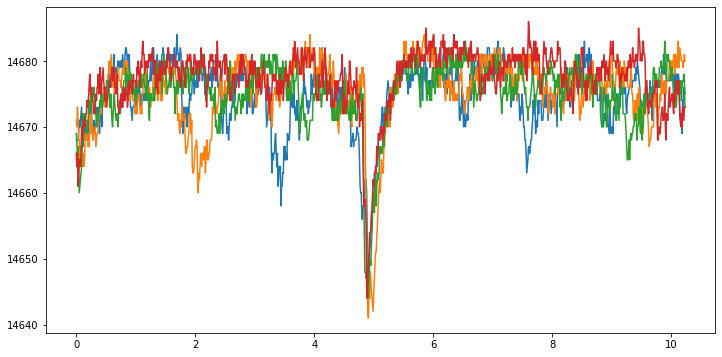

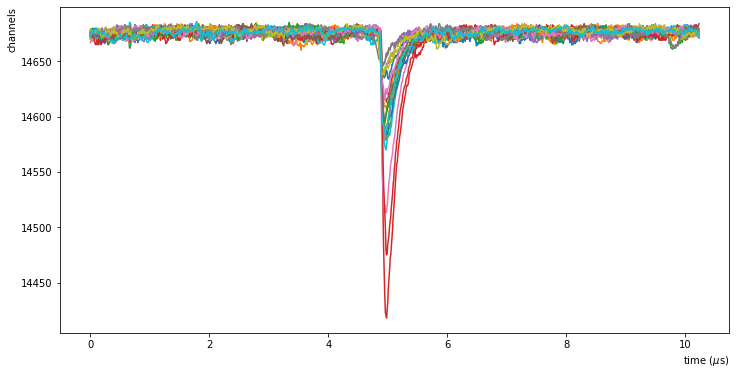

<Figure size 864x432 with 0 Axes>

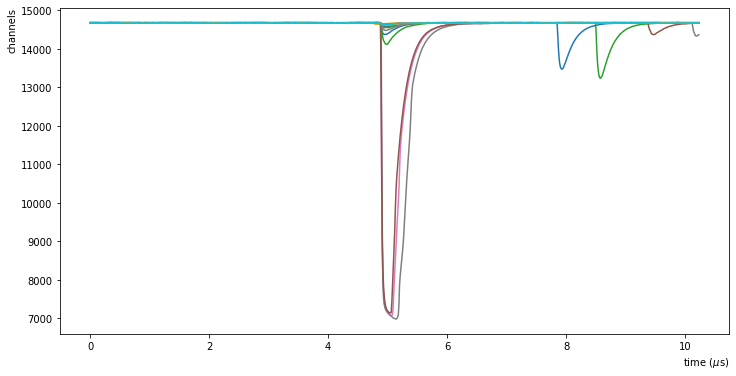

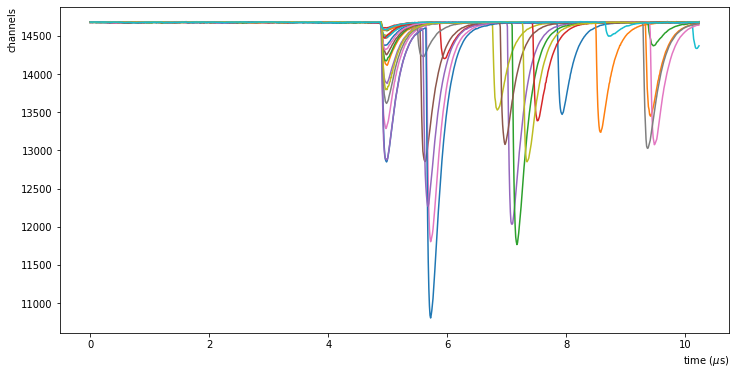

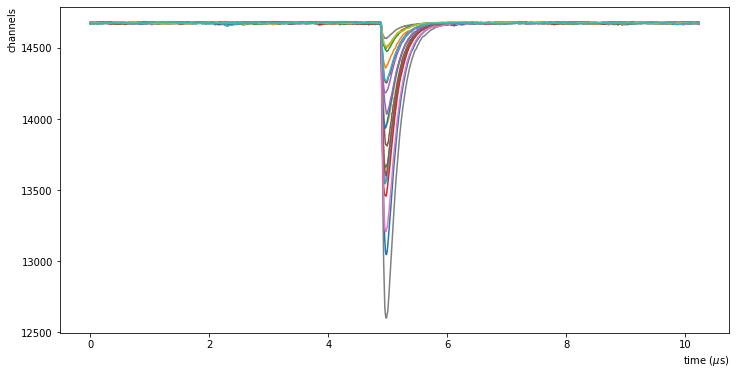

In [5]:
new_data, new_wf = pau.select_data(data1,filename=file1,entr_cut=50,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(480,550),rt_cut=1,events=20,volts=0,sipmv=30,
                                   save=1,info='th30_file1')

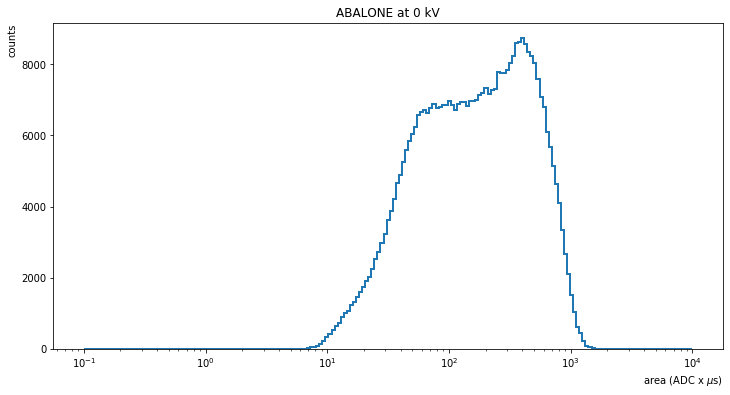

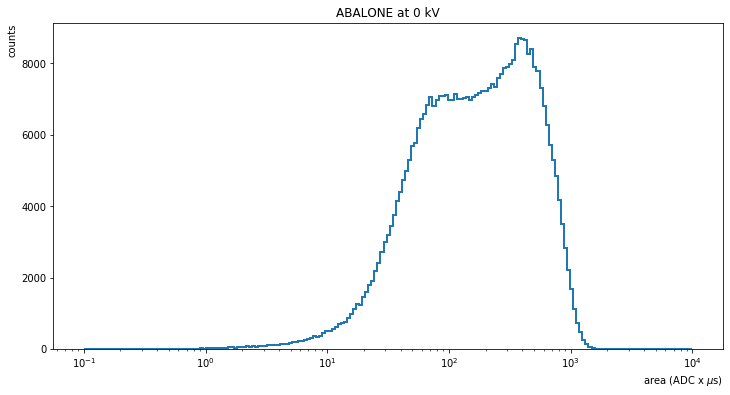

<Figure size 864x432 with 0 Axes>

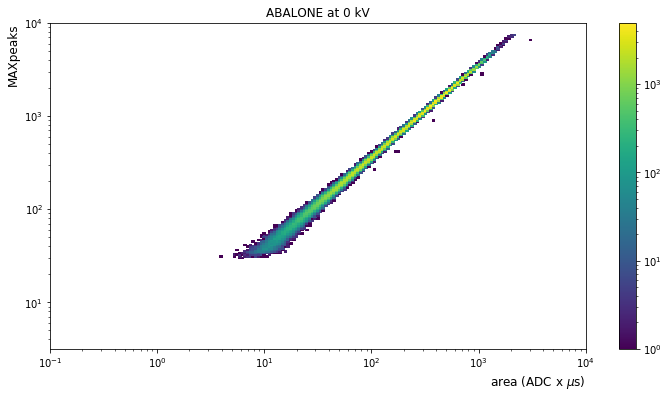

<Figure size 864x432 with 0 Axes>

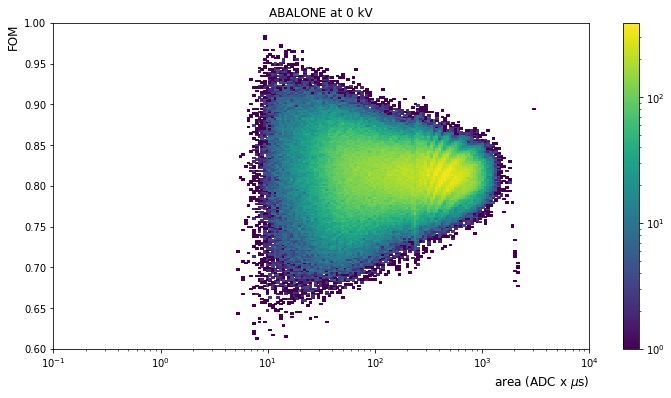

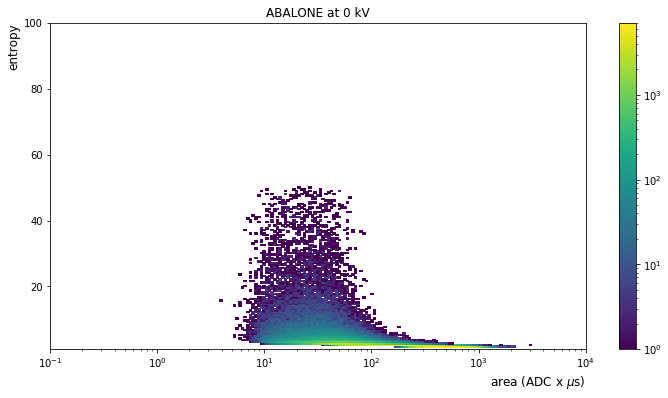

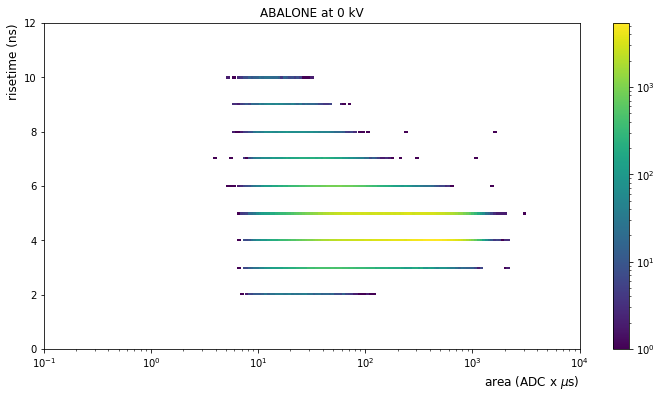

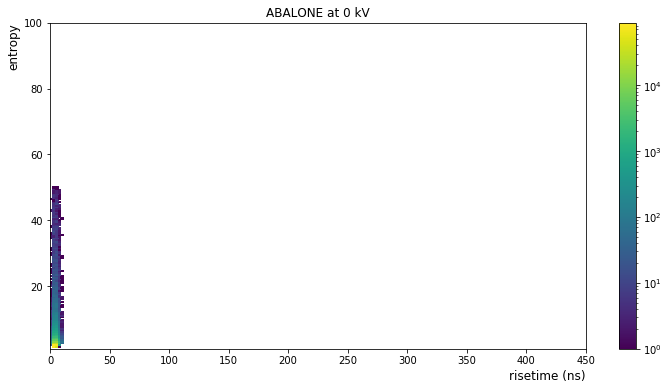

<Figure size 864x432 with 0 Axes>

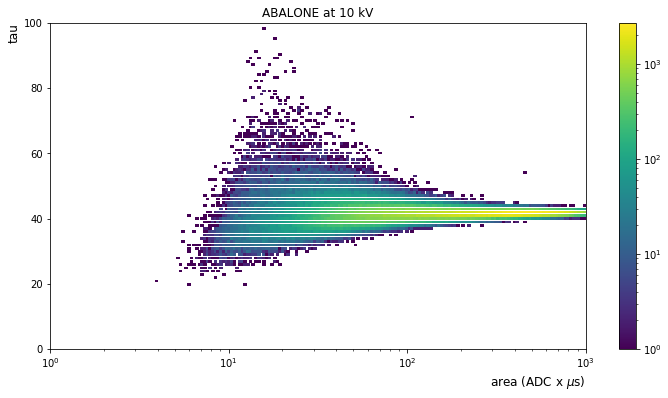

In [6]:
pau.plot_data(data=new_data,fvolt=0,low=-1, high=4,low_max=0.5,high_max=4,
              low_en=1, high_en=100,low_fom=0.6,high_fom=1,high_rt=12)

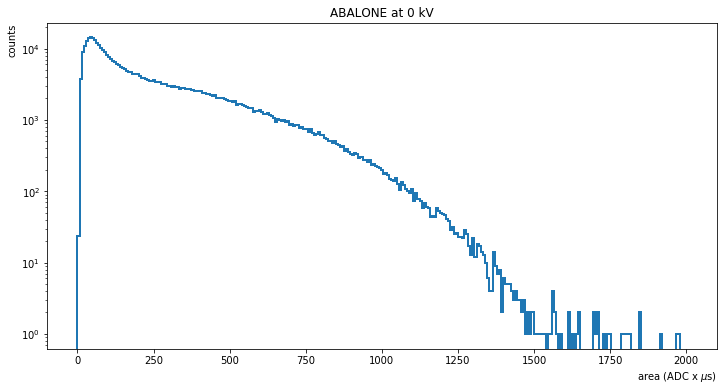

In [36]:
pau.plot_pe_spectrum(new_data['area'], high=2000, log = 1)

n. events 124639 waveform samples 1024


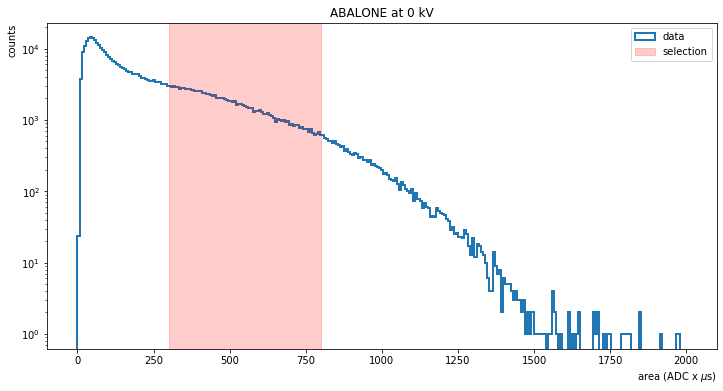

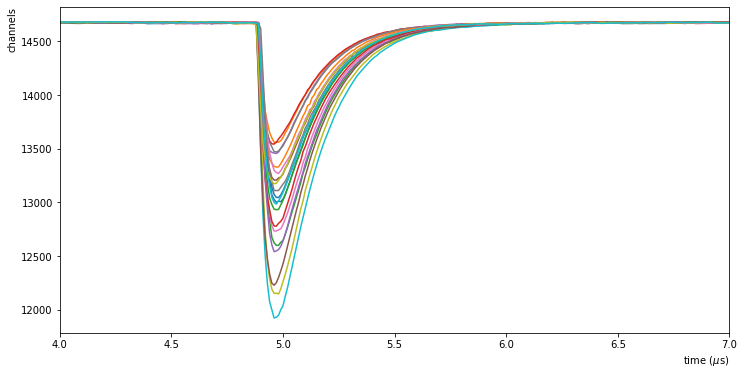

In [37]:
pau.waveform_selection(new_data['area'],new_wf, high=2000,sel=(300,800),log=1)

/home/abalone-data/background-lyso/30Vthr30/2022_04_27_T1456_ABALONE_0kV_SiPM2_30V_thr30.dat Number of events 433625.0
Total events: 10
peak position not found in trigger region [323 464 488 497 655 847 894 940 997]


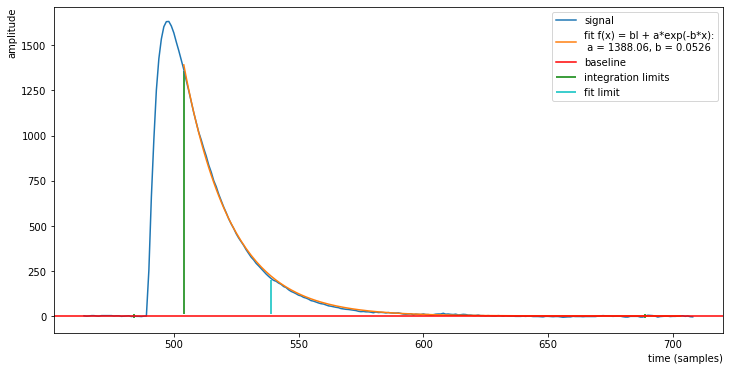

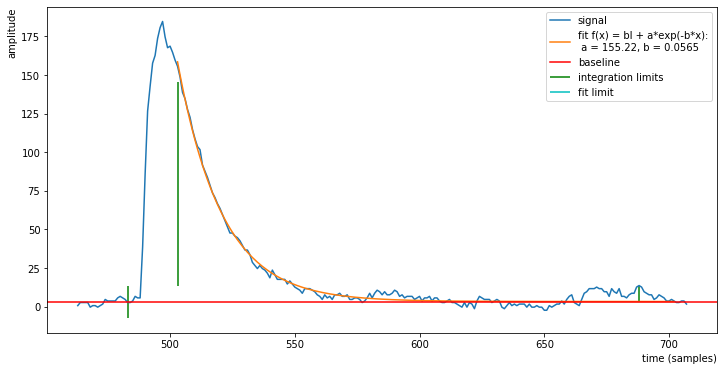

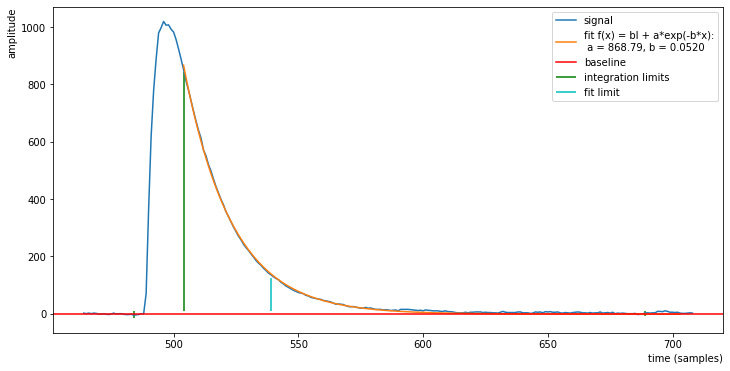

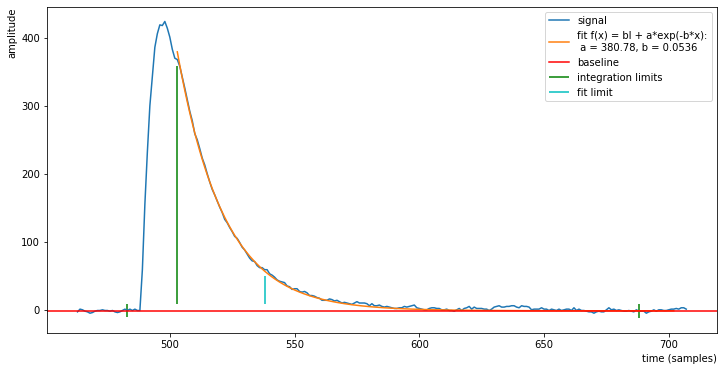

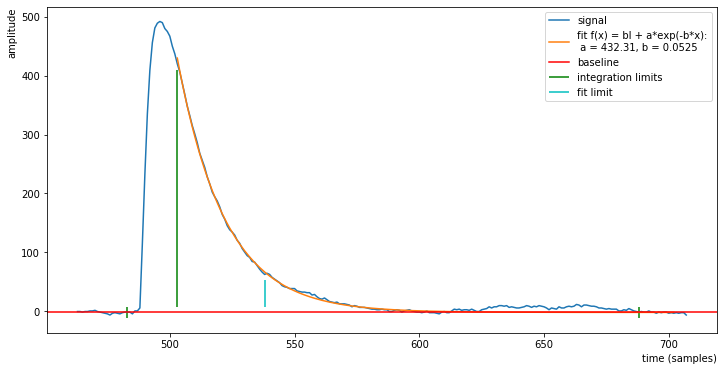

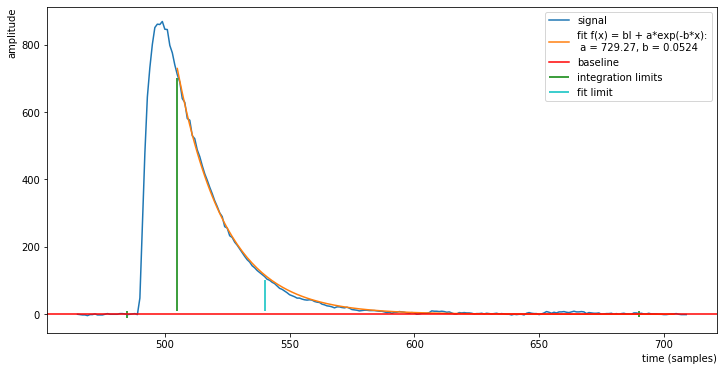

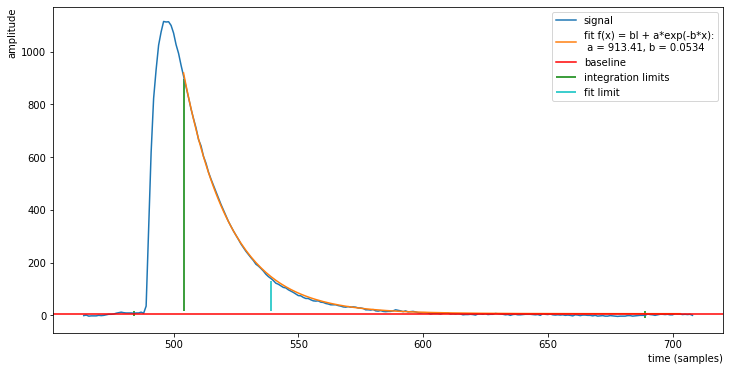

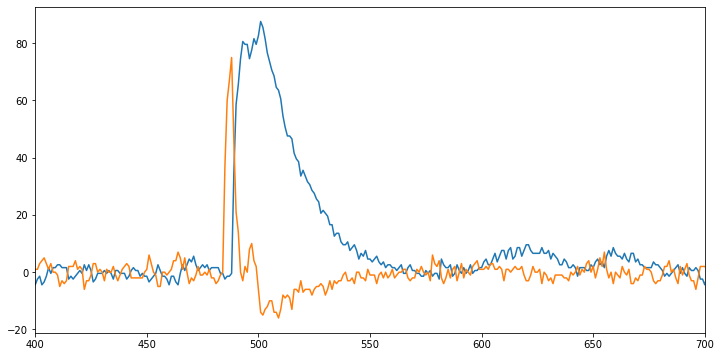

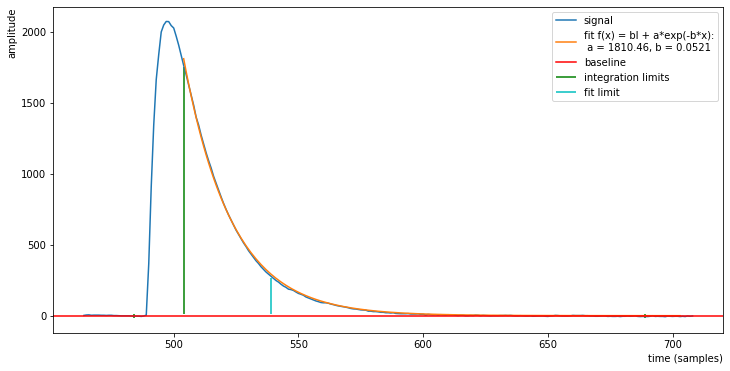

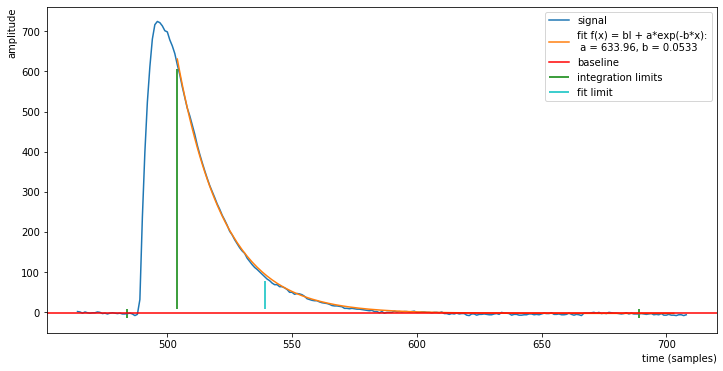

In [3]:
wfs1 = psu.read_file(file1)
dataint = pau.calculate_integrals(wfs1, nn=10, volts=0, sipmv = 30, plot = 1)

In [4]:
dataint = pau.calculate_integrals(wfs1, nn=10000, volts=0, sipmv = 30, plot = 0,
                             save=0, info='th30_file1')

Total events: 10000
event n. 10000, time to process: 30.16


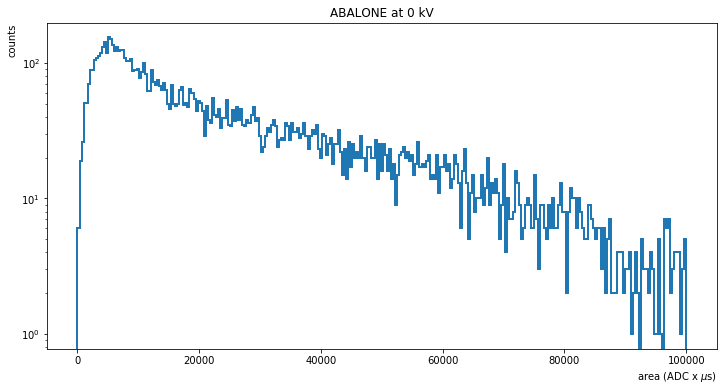

In [42]:
pau.plot_pe_spectrum(dataint['integral'], low=1,high=100000, log = 1)

In [43]:
wfs2 = psu.read_file(file2)
wfs3 = psu.read_file(file3)
wfs4 = psu.read_file(file4)

/home/abalone-data/background-lyso/30Vthr30/2022_04_28_T0818_ABALONE_0kV_SiPM2_30V_thr30.dat Number of events 435249.0
/home/abalone-data/background-lyso/30Vthr30/2022_04_28_T1143_ABALONE_0kV_SiPM2_30V_thr30.dat Number of events 434633.0
/home/abalone-data/background-lyso/30Vthr30/2022_05_02_T1553_ABALONE_0kV_SiPM2_30V_thr30.dat Number of events 419686.0


In [44]:
dataint2 = calculate_integrals(wfs2, nn=1000, volts=0, sipmv = 30, plot = 0,
                             save=1, info='th30_file2')

Total events: 1000


In [47]:
dataint3 = calculate_integrals(wfs3, nn=1000, volts=0, sipmv = 30, plot = 0,
                             save=1, info='th30_file3')

Total events: 1000


In [48]:
dataint4 = calculate_integrals(wfs4, nn=1000, volts=0, sipmv = 30, plot = 0,
                             save=1, info='th30_file4')

Total events: 1000


In [50]:
data_all = pd.concat([dataint, dataint2, dataint3, dataint4])

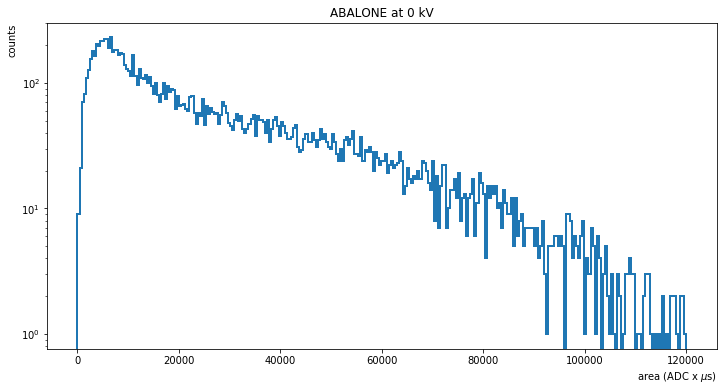

In [52]:
pau.plot_pe_spectrum(data_all['integral'], low=1,high=120000, log = 1)